# A simple neural network - from scratch

## Objectives
- More practice with numpy
- Understand what's happening in neural networks

In this exercise, we'll train the 2-layer network discussed in class:

![](../figs/ann.svg)

In [69]:
import numpy as np
import matplotlib.pyplot as plt

First, let's take a look at the version that had linear activation and no bias terms:

In [70]:
# toy mlp example
# forward pass
x = np.array([[2, 3],[3, 4]])
y = np.array([1,0])
w1 = np.array([[-0.78, 0.13], [0.85, 0.23]])
w2 = np.array([1.8, 0.40])

iterations = 20
eta = 0.01
loss = np.zeros(iterations)

for i in range(iterations):
    # forward pass
    y_hat = x @ w1 @ w2
    
    # update loss
    loss[i] = 0.5 * (y_hat - y)**2

    # backpropagate!
    w2_partials = (y_hat - y) * (x @ w1)
    w1_partials = np.outer(w2_partials, x)

    w1 = w1 - eta * w1_partials
    w2 = w2 - eta * w2_partials

plt.plot(loss)

# check how well we did
print("Final prediction:", x @ w1 @ w2)

ValueError: setting an array element with a sequence.

This time, let's initialize random weights. X and y are the same as before.

In [ ]:
w1 = np.random.randn(2,2)
w2 = np.random.randn(2)

Next, we need to define the activation function and its derivative. The ReLU function is defined as:

$$\text{ReLU}(z) = \max(0, z), \hspace{0.5cm} \frac{d\text{ReLU}}{dz} = \begin{cases} 0 & z < 0 \\ 1 & z > 0 \end{cases}$$

Feel free to try other activation functions if you want to experiment.

In [ ]:
def activation(z):
    return z * (z > 0)

def d_activation(z):
    return (z > 0).astype(int)

# test = np.array([1, -1, 0, 10])
# d_activation(test)

Let's do the same for the mean squared error loss and its derivative (just scalar form):

In [ ]:
def L(y_hat, y):
    return 0.5 * (y_hat - y)**2

def d_L(y_hat, y):
    return (y_hat - y)

Let's add some more functions to make things more readable. We'll define a function to compute the forward pass, and another to compute the backward pass.

In [ ]:
def forward(x, w1, w2):
    return activation(x @ w1) @ w2

In [ ]:
def backward(x, y, y_hat, w1):
    w2_partials = d_L(y_hat, y) * activation(x @ w1)
    w1_partials = np.outer(d_activation(w2_partials), x)
    return w1_partials, w2_partials

In [ ]:
def step(w1, w2, w1_partials, w2_partials, eta):
    w1 -= eta * w1_partials
    w2 -= eta * w2_partials

Finally, iterate! Run the following cell repeatedly to observe the loss changing.

In [71]:

x = np.array([[2, 3],[3, 4]])
y = np.array([1,0])

y_hat = forward(x, w1, w2)
w1_partials, w2_partials = backward(x, y, y_hat, w1)
step(w1, w2, w1_partials, w2_partials, eta)
L(y_hat, y)

ValueError: operands could not be broadcast together with shapes (2,2) (4,4) (2,2) 

Of course, repeatedly running code is much better done with a loop. In the next cell, write a loop that runs the forward and backwards passes `iterations` times, keeping track of the loss. Plot the loss as a function of iteration number.

Final prediction: 0.9999987428023331


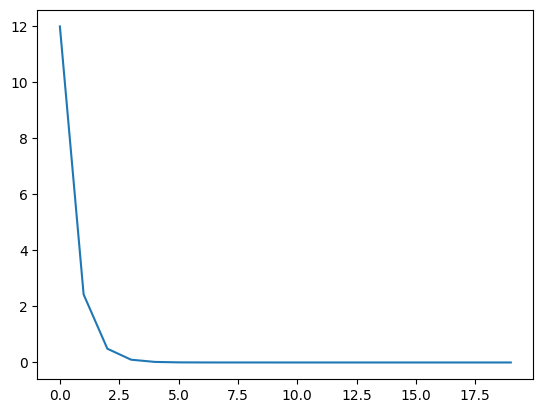

In [ ]:
# re-initialize weights
w1 = np.random.randn(2,2)
w2 = np.random.randn(2)

loss = np.zeros(iterations)
for i in range(iterations):
    y_hat = forward(x, w1, w2)
    loss[i] = L(y_hat, y)
    w1_partials, w2_partials = backward(x, y, y_hat, w1)
    step(w1, w2, w1_partials, w2_partials, eta)

plt.plot(loss)
print("Final prediction:", y_hat)